In [1]:
#!pip install tensorflow

In [2]:
import os
import numpy as np
import itertools
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Activation
from IPython.display import display
from tensorflow.keras.preprocessing.image import array_to_img
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [3]:
LABEL_NAMES = range(10)
IMAGE_WIDTH = 28
IMAGE_BREADTH = 28
COLOR_CHANNELS = 1
NR_CLASSES = 10
TOTAL_INPUTS = IMAGE_WIDTH*IMAGE_BREADTH*COLOR_CHANNELS
VALIDATION_SIZE = 10000

In [4]:
(x_train_all, y_train_all), (x_test, y_test)=mnist.load_data()

In [5]:
y_train_all[0]

5

In [6]:
LABEL_NAMES[y_train_all[0]]

5

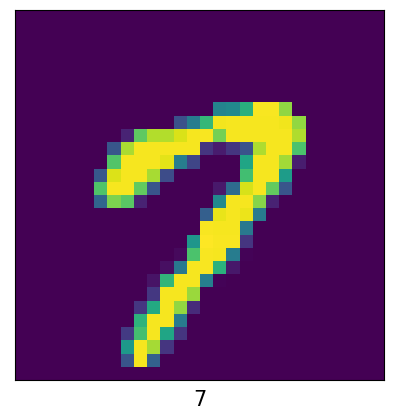

In [7]:
plt.imshow(x_train_all[15])

plt.xlabel(LABEL_NAMES[y_train_all[15]], fontsize = 15)

plt.xticks([])
plt.yticks([])

plt.show()

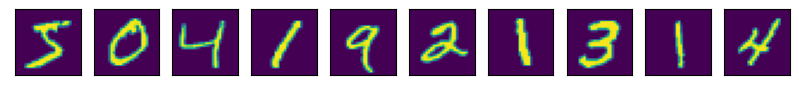

In [8]:
plt.figure(figsize=(10,8))

for i in range(10):
    plt.subplot(1,10,i+1)
    img=x_train_all[i]
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
plt.show()

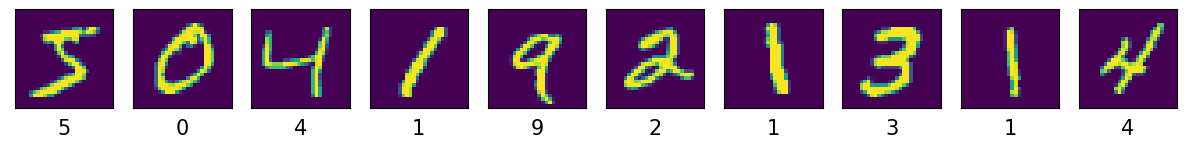

In [9]:
plt.figure(figsize=(15,5))


for i in range(10):
    
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])

    plt.xlabel(LABEL_NAMES[y_train_all[i]], fontsize = 15)
    
    plt.imshow(x_train_all[i])

In [10]:
x_train_all , x_test = x_train_all/255.0, x_test/255.0

In [11]:
x_train_all=x_train_all.reshape(x_train_all.shape[0],TOTAL_INPUTS)
x_train_all.shape

(60000, 784)

In [12]:
x_test=x_test.reshape(len(x_test), TOTAL_INPUTS )

In [13]:
x_val= x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]

In [14]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]

In [15]:
# creating a neural network..
# 1. define, 2. compile, 3. fit

In [16]:
# definition....
model = Sequential([
            Dense(units = 128, input_dim = TOTAL_INPUTS, activation = 'relu', name = 'm1_hidden1' ),
            Dense(units = 64, activation = 'relu', name = 'm1_hidden2'),
            Dense(units = 16, activation = 'relu', name = 'm1_hidden3'),
            Dense(units = 10, activation = 'softmax', name = 'm1_output')
           ])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m1_hidden1 (Dense)          (None, 128)               100480    
                                                                 
 m1_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m1_hidden3 (Dense)          (None, 16)                1040      
                                                                 
 m1_output (Dense)           (None, 10)                170       
                                                                 
Total params: 109,946
Trainable params: 109,946
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

In [19]:
nr_epochs = 100
history=model.fit(x_train, y_train, batch_size = 1000, epochs = nr_epochs, verbose = 1, validation_data = (x_val, y_val))
print(history.history.keys())

Epoch 1/100
50/50 [==============================] - 2s 15ms/step - loss: 1.2108 - accuracy: 0.6242 - val_loss: 0.4649 - val_accuracy: 0.8829
Epoch 2/100
50/50 [==============================] - 1s 11ms/step - loss: 0.3387 - accuracy: 0.9064 - val_loss: 0.2643 - val_accuracy: 0.9248
Epoch 3/100
50/50 [==============================] - 1s 11ms/step - loss: 0.2316 - accuracy: 0.9335 - val_loss: 0.2096 - val_accuracy: 0.9413
Epoch 4/100
50/50 [==============================] - 1s 11ms/step - loss: 0.1862 - accuracy: 0.9469 - val_loss: 0.1863 - val_accuracy: 0.9451
Epoch 5/100
50/50 [==============================] - 1s 11ms/step - loss: 0.1543 - accuracy: 0.9560 - val_loss: 0.1607 - val_accuracy: 0.9530
Epoch 6/100
50/50 [==============================] - 1s 11ms/step - loss: 0.1323 - accuracy: 0.9618 - val_loss: 0.1509 - val_accuracy: 0.9568
Epoch 7/100
50/50 [==============================] - 1s 11ms/step - loss: 0.1146 - accuracy: 0.9668 - val_loss: 0.1337 - val_accuracy: 0.9611
Epoch 

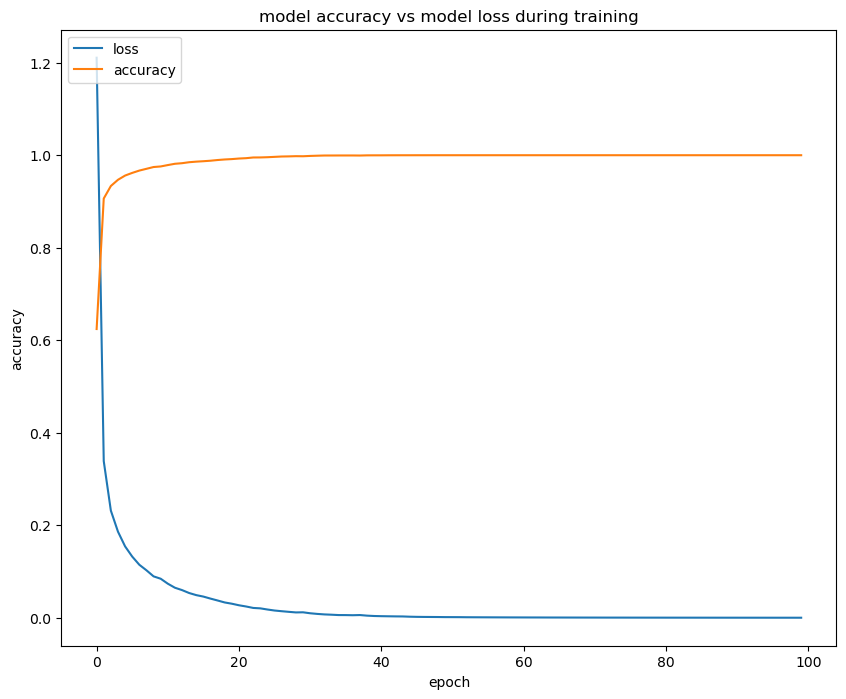

In [20]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy vs model loss during training')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

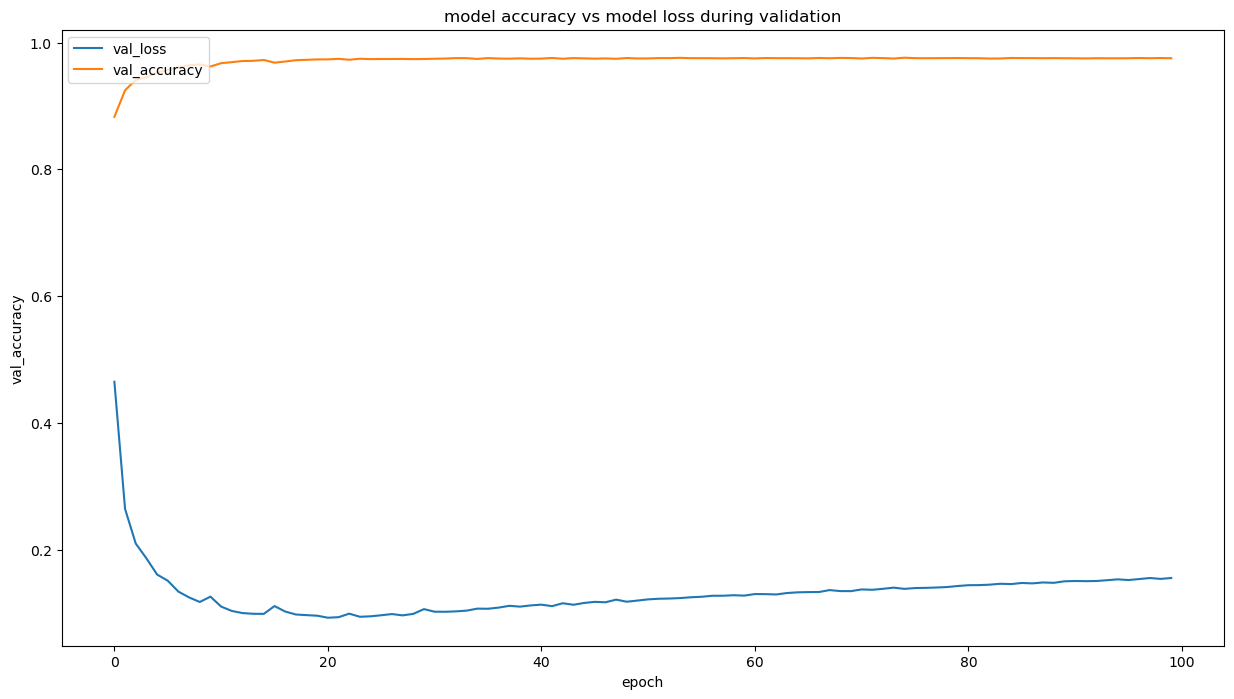

In [21]:
plt.figure(figsize=(15,8))
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy vs model loss during validation')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='upper left')
plt.show()

In [22]:
test=np.expand_dims(x_val[0], axis = 0)
test.shape

(1, 784)

In [23]:
np.set_printoptions(precision = 3)

In [24]:
model.predict(test)

1/1 [==============================] - 0s 116ms/step


array([[5.088e-30, 3.789e-23, 6.464e-21, 1.562e-07, 2.876e-25, 1.000e+00,
        4.493e-24, 4.035e-19, 8.482e-24, 1.016e-19]], dtype=float32)

In [25]:
model.predict(test).shape

1/1 [==============================] - 0s 21ms/step


(1, 10)

In [26]:
np.argmax(model.predict(test), axis =1)[0]

1/1 [==============================] - 0s 29ms/step


5

In [27]:
y_val[0]

5

In [28]:
y_val

array([5, 0, 4, ..., 6, 9, 7], dtype=uint8)

In [29]:
for number in range(20):
    
    test_img = np.expand_dims(x_val[number], axis=0)
    predicted_val = np.argmax(model.predict(test_img)[0])
    print(f'Actual value: {y_val[number]} vs. predicted: {predicted_val}')

1/1 [==============================] - 0s 25ms/step
Actual value: 5 vs. predicted: 5
1/1 [==============================] - 0s 22ms/step
Actual value: 0 vs. predicted: 0
1/1 [==============================] - 0s 25ms/step
Actual value: 4 vs. predicted: 4
1/1 [==============================] - 0s 26ms/step
Actual value: 1 vs. predicted: 1
1/1 [==============================] - 0s 33ms/step
Actual value: 9 vs. predicted: 9
1/1 [==============================] - 0s 35ms/step
Actual value: 2 vs. predicted: 2
1/1 [==============================] - 0s 37ms/step
Actual value: 1 vs. predicted: 1
1/1 [==============================] - 0s 29ms/step
Actual value: 3 vs. predicted: 3
1/1 [==============================] - 0s 27ms/step
Actual value: 1 vs. predicted: 1
1/1 [==============================] - 0s 27ms/step
Actual value: 4 vs. predicted: 4
1/1 [==============================] - 0s 48ms/step
Actual value: 3 vs. predicted: 3
1/1 [==============================] - 0s 26ms/step
Actual value:

In [30]:
model.metrics_names

['loss', 'accuracy']

In [31]:
test_loss, test_accuracy=model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1505 - accuracy: 0.9767


In [32]:
predictions = np.argmax(model.predict(x_test), axis = 1)

313/313 [==============================] - 0s 1ms/step


In [33]:
predictions.shape

(10000,)

In [34]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

In [35]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [36]:
conf_matrix

array([[ 966,    0,    1,    0,    1,    5,    3,    1,    2,    1],
       [   0, 1124,    3,    2,    0,    1,    2,    1,    2,    0],
       [   1,    3, 1003,    8,    2,    0,    2,    7,    6,    0],
       [   1,    0,    7,  988,    0,    4,    2,    1,    4,    3],
       [   0,    0,    2,    0,  959,    0,    6,    3,    2,   10],
       [   2,    0,    0,    9,    1,  866,    6,    1,    5,    2],
       [   8,    3,    3,    1,    2,    5,  935,    0,    1,    0],
       [   1,    3,    9,    3,    2,    0,    0, 1004,    1,    5],
       [   5,    1,    2,    8,    1,    7,    2,    4,  941,    3],
       [   0,    3,    1,    3,    8,    4,    0,    5,    4,  981]],
      dtype=int64)

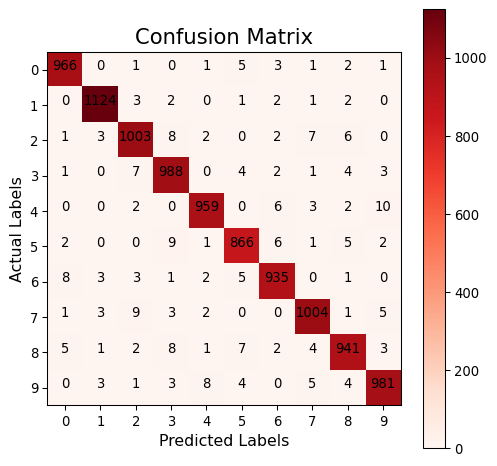

In [37]:
plt.figure(figsize=(6,6), dpi=95)

plt.imshow(conf_matrix, cmap = plt.cm.Reds)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)


for i , j in itertools.product(range(nr_rows), range(nr_cols)):
    
    plt.text(j,i, conf_matrix[i,j], horizontalalignment = 'center')
    #plt.text(x, y, s, fontdict=None, **kwargs)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

plt.show()

In [38]:

np.diag(conf_matrix)

array([ 966, 1124, 1003,  988,  959,  866,  935, 1004,  941,  981],
      dtype=int64)

In [39]:
recall=np.diag(conf_matrix)/np.sum(conf_matrix, axis=1)
recall

array([0.986, 0.99 , 0.972, 0.978, 0.977, 0.971, 0.976, 0.977, 0.966,
       0.972])

In [40]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.982, 0.989, 0.973, 0.967, 0.983, 0.971, 0.976, 0.978, 0.972,
       0.976])

In [41]:
avg_recall = np.mean(recall)
avg_recall

0.976458432619577

In [42]:
avg_precision = np.mean(precision)
avg_precision

0.9765104668421722

In [43]:
f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
f1_score*100

97.64844490376838

In [44]:
model_1 = Sequential()
model_1.add(Dense(128, activation='relu', name='m2_hidden1'))
model_1.add(Dense(64, activation='relu', name='m2_hidden2'))
model_1.add(Dense(16, activation='relu', name='m2_hidden3'))
model_1.add(Dense(10, activation='softmax', name='m2_output'))

In [45]:
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
nr_epochs = 100
history=model_1.fit(x_train, y_train, batch_size = 1000, epochs = nr_epochs, verbose = 1, validation_data = (x_val, y_val))
print(history.history.keys())

Epoch 1/100
50/50 [==============================] - 2s 15ms/step - loss: 1.0960 - accuracy: 0.6778 - val_loss: 0.3944 - val_accuracy: 0.8937
Epoch 2/100
50/50 [==============================] - 1s 11ms/step - loss: 0.3138 - accuracy: 0.9128 - val_loss: 0.2459 - val_accuracy: 0.9328
Epoch 3/100
50/50 [==============================] - 1s 11ms/step - loss: 0.2208 - accuracy: 0.9381 - val_loss: 0.1950 - val_accuracy: 0.9464
Epoch 4/100
50/50 [==============================] - 1s 11ms/step - loss: 0.1757 - accuracy: 0.9505 - val_loss: 0.1710 - val_accuracy: 0.9530
Epoch 5/100
50/50 [==============================] - 1s 11ms/step - loss: 0.1473 - accuracy: 0.9582 - val_loss: 0.1513 - val_accuracy: 0.9575
Epoch 6/100
50/50 [==============================] - 1s 12ms/step - loss: 0.1264 - accuracy: 0.9643 - val_loss: 0.1497 - val_accuracy: 0.9572
Epoch 7/100
50/50 [==============================] - 1s 12ms/step - loss: 0.1117 - accuracy: 0.9679 - val_loss: 0.1315 - val_accuracy: 0.9618
Epoch 

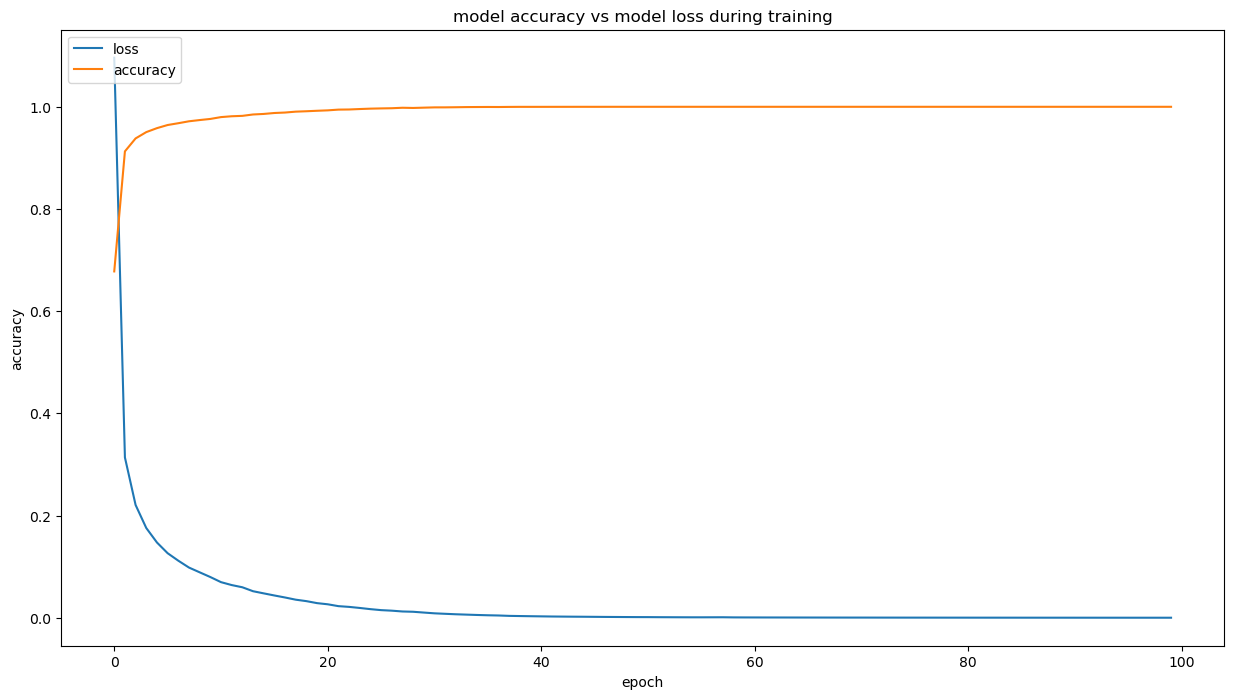

In [47]:
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy vs model loss during training')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

In [48]:
test=np.expand_dims(x_val[0], axis = 0)
test.shape

(1, 784)